Particle Swarm Optimization (PSO) is a metaheuristic algorithm inspired by the collective behavior of bird flocks or fish schools. It can also be applied to solve optimization problems, including the Traveling Salesman Problem (TSP). Here's an explanation of how PSO algorithms can be used to solve the TSP:

Initialization: Generate an initial population of particles, where each particle represents a possible solution to the TSP. Each particle consists of a sequence of cities representing a tour.

Fitness Evaluation: Evaluate the fitness of each particle in the population. In the context of the TSP, the fitness can be defined as the total distance of the tour represented by each particle.

Velocity and Position Update: Each particle adjusts its velocity and updates its position based on its previous position, the position of its best-known solution (pbest), and the position of the best solution found by any particle in the population (gbest).

a. Velocity Update: The velocity of each particle is updated based on its previous velocity, cognitive component, and social component. The cognitive component guides the particle towards its pbest position, while the social component guides the particle towards the gbest position.

b. Position Update: The position of each particle is updated based on its previous position and the updated velocity. This determines the new tour or sequence of cities for the particle.

Update pbest and gbest: After updating the positions, each particle compares its new fitness value with its previous best-known solution (pbest). If the new fitness is better, the pbest is updated. Additionally, the gbest is updated by comparing the fitness values of all particles in the population.

Repeat: Iteratively perform velocity and position updates, and update pbest and gbest, for a certain number of iterations or until a termination criterion is met (e.g., a maximum number of generations or a convergence criterion).

Termination: Once the termination criterion is met, the algorithm stops, and the particle with the best-known solution (gbest) represents the optimal or near-optimal solution to the TSP.

The PSO algorithm aims to iteratively explore the solution space by adjusting the velocities and positions of particles based on their own experience (pbest) and the knowledge shared by the best particle (gbest). By leveraging both individual and social information, the algorithm seeks to converge towards an optimal or near-optimal solution for the TSP.

It's important to note that the actual implementation of PSO algorithms for solving the TSP can involve additional details, such as the specific calculation of the cognitive and social components, the use of velocity clamping or inertia weight, and the termination criteria. Different variants and modifications of PSO algorithms may introduce variations in these aspects.



The Blue Whale Optimization (BWO) algorithm is a nature-inspired optimization algorithm that is inspired by the behavior of blue whales in the ocean. It is a metaheuristic algorithm used to solve optimization problems, including the Traveling Salesman Problem (TSP).

The TSP is a well-known combinatorial optimization problem that seeks to find the shortest possible route for a salesman to visit a set of cities and return to the starting city, visiting each city exactly once. The goal is to minimize the total distance traveled.

The BWO algorithm mimics the hunting behavior of blue whales to find an optimal solution for the TSP. Here's a simplified explanation of how the algorithm works:

Initialization: Generate an initial population of candidate solutions. Each solution represents a possible tour of the cities.

Fitness Evaluation: Evaluate the fitness of each solution in the population. In the TSP context, the fitness can be defined as the total distance of the tour. The shorter the distance, the better the fitness.

Blue Whale Behavior: The algorithm emulates the hunting behavior of blue whales, which involves diving, searching, and feeding.

a. Diving: Select a subset of the top-performing solutions (whales) in the population based on their fitness values.

b. Searching: Apply local search or exploration mechanisms to the selected solutions. This can involve making small modifications to the tours, such as swapping cities or inserting cities in different positions, to explore new potential solutions.

c. Feeding: Update the best solution found so far (the global best) based on the fitness values of the modified solutions. If a better solution is found, it replaces the previous best solution.

Repeat: Iterate the diving, searching, and feeding steps for a certain number of iterations or until a termination criterion is met (e.g., a maximum number of generations or a convergence criterion).

Termination: Once the termination criterion is met, the algorithm stops, and the best solution obtained throughout the iterations is considered the optimal or near-optimal solution to the TSP.

The BWO algorithm incorporates the diving, searching, and feeding behaviors in an iterative manner to explore the solution space and improve the quality of the solutions. By iteratively updating and exploring the candidate solutions, the algorithm aims to converge towards an optimal or near-optimal solution for the TSP.

It's important to note that the actual implementation of the BWO algorithm for solving the TSP can involve additional details, such as the selection mechanism for diving, the specific local search operators used in the searching phase, and the termination criteria. These details may vary depending on the specific variant or modifications of the BWO algorithm employed.

Overall, the BWO algorithm is a nature-inspired optimization technique that applies the hunting behavior of blue whales to solve optimization problems like the TSP, aiming to find high-quality solutions by exploring and exploiting the solution space effectively.

Best TSP solution: [14, 13, 6, 15, 11, 18, 3, 4, 5, 12, 7, 19, 17, 9, 10, 1, 16, 2, 0, 8]
Best TSP distance: 10.457579202774733


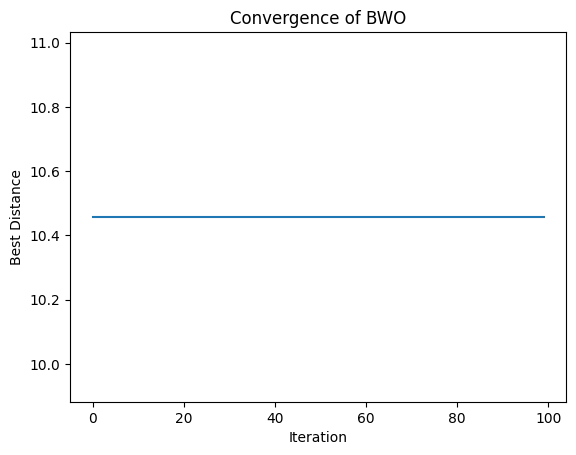

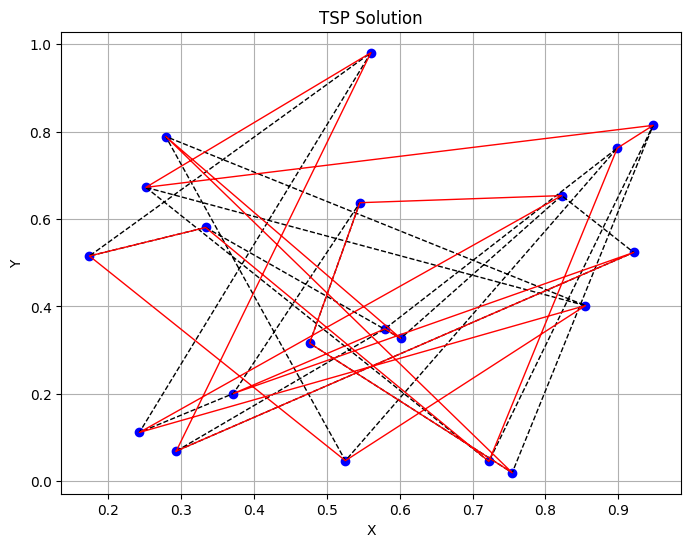

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define problem-specific parameters
num_cities = 20
city_coordinates = [(x, y) for x, y in zip(np.random.rand(num_cities), np.random.rand(num_cities))]

# Define BWO-related parameters
feeding_factor = 0.2

# Define fitness function
def calculate_distance(city1, city2):
    return np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)

def calculate_total_distance(solution):
    total_distance = 0
    for i in range(len(solution)-1):
        total_distance += calculate_distance(city_coordinates[solution[i]], city_coordinates[solution[i+1]])
    total_distance += calculate_distance(city_coordinates[solution[-1]], city_coordinates[solution[0]])
    return total_distance

# Define BWO initialization
class Particle:
    def __init__(self, num_cities):
        self.solution = random.sample(range(num_cities), num_cities)
        self.pbest_solution = self.solution[:]
        self.pbest_distance = float('inf')

def initialize_swarm(num_cities):
    return [Particle(num_cities)]

# Define BWO leader selection and bubble-net feeding
def select_global_leader(swarm):
    return min(swarm, key=lambda x: calculate_total_distance(x.solution))

def bubble_net_feeding(swarm):
    global_leader = select_global_leader(swarm)
    for particle in swarm:
        for i in range(len(particle.solution)):
            if random.random() < feeding_factor:
                particle.solution[i] = global_leader.solution[i]

# Initialize BWO
swarm = initialize_swarm(num_cities)
gbest_solution = swarm[0].solution[:]
gbest_distance = calculate_total_distance(gbest_solution)

# BWO iterations
max_iterations = 100
distances = []  # Store the best distance found in each iteration
for iteration in range(max_iterations):
    # Update particle personal best (pbest) solution and global best (gbest) solution
    for particle in swarm:
        particle_distance = calculate_total_distance(particle.solution)
        if particle_distance < particle.pbest_distance:
            particle.pbest_distance = particle_distance
            particle.pbest_solution = particle.solution[:]
        if particle_distance < gbest_distance:
            gbest_distance = particle_distance
            gbest_solution = particle.solution[:]

    # BWO bubble-net feeding
    bubble_net_feeding(swarm)

    # Store the best distance found in this iteration
    distances.append(gbest_distance)

# Print the best solution found
print("Best TSP solution:", gbest_solution)
print("Best TSP distance:", gbest_distance)

# Plot the convergence graph
plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('Convergence of BWO')
plt.show()

# Plot the best solution found
x = [coord[0] for coord in city_coordinates]
y = [coord[1] for coord in city_coordinates]
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo')
plt.plot(x + [x[0]], y + [y[0]], 'k--', linewidth=1)
plt.plot([x[i] for i in gbest_solution] + [x[gbest_solution[0]]], [y[i] for i in gbest_solution] + [y[gbest_solution[0]]], 'r-', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution')
plt.grid(True)
plt.show()


Best TSP solution (PSO): [ 2  3 19 15  1  6  9 10  4 18  0 11  7 12 16 14  8 13 17  5]
Best TSP distance (PSO): 8.613987267566841


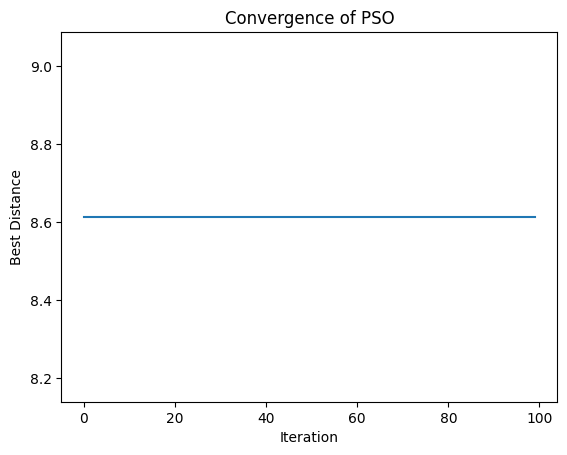

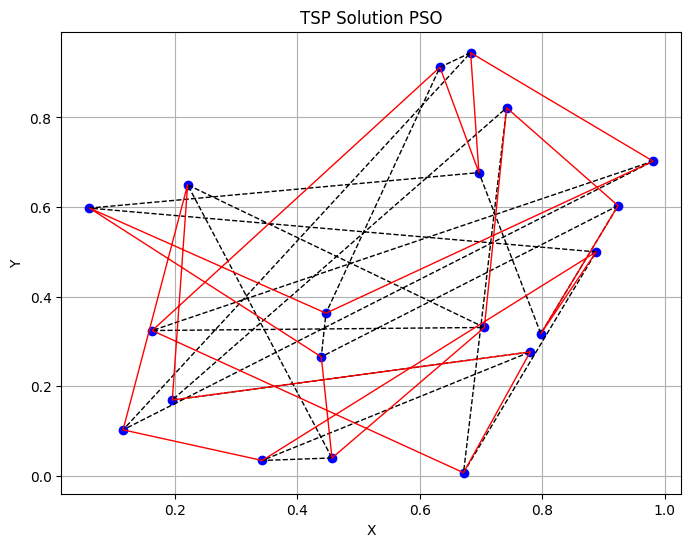

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define problem-specific parameters
num_cities = 20
city_coordinates = [(x, y) for x, y in zip(np.random.rand(num_cities), np.random.rand(num_cities))]

# Define PSO-related parameters
swarm_size = 50
max_iterations = 100
w = 0.5
c1 = 2.0
c2 = 2.0
neighborhood_size = 5

# Define fitness function
def calculate_distance(city1, city2):
    return np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)

def calculate_total_distance(solution):
    total_distance = 0
    for i in range(len(solution)-1):
        total_distance += calculate_distance(city_coordinates[solution[i]], city_coordinates[solution[i+1]])
    total_distance += calculate_distance(city_coordinates[solution[-1]], city_coordinates[solution[0]])
    return total_distance

# Define PSO initialization
class Particle:
    def __init__(self, num_cities):
        self.solution = random.sample(range(num_cities), num_cities)
        self.velocity = np.zeros(num_cities)
        self.pbest_solution = self.solution[:]
        self.pbest_distance = float('inf')

def initialize_swarm(num_cities, swarm_size):
    return [Particle(num_cities) for _ in range(swarm_size)]

# Define PSO update equations
def update_particle_velocity(particle, gbest_solution):
    for i in range(len(particle.solution)):
        r1 = random.random()
        r2 = random.random()
        cognitive_velocity = c1 * r1 * (particle.pbest_solution[i] - particle.solution[i])
        social_velocity = c2 * r2 * (gbest_solution[i] - particle.solution[i])
        particle.velocity[i] = w * particle.velocity[i] + cognitive_velocity + social_velocity

def update_particle_position(particle):
    particle.solution = np.roll(particle.solution, int(particle.velocity[0]))
    particle.velocity = np.roll(particle.velocity, 1)

# Initialize PSO
swarm = initialize_swarm(num_cities, swarm_size)
gbest_solution = swarm[0].solution[:]
gbest_distance = calculate_total_distance(gbest_solution)

# PSO iterations
distances = []  # Store the best distance found in each iteration
for iteration in range(max_iterations):
    # Update particle velocities and positions
    for particle in swarm:
        update_particle_velocity(particle, gbest_solution)
        update_particle_position(particle)

    # Update particle personal best (pbest) solutions and global best (gbest) solution
    for particle in swarm:
        particle_distance = calculate_total_distance(particle.solution)
        if particle_distance < particle.pbest_distance:
            particle.pbest_distance = particle_distance
            particle.pbest_solution = particle.solution[:]
        if particle_distance < gbest_distance:
            gbest_distance = particle_distance
            gbest_solution = particle.solution[:]

    # Store the best distance found in this iteration
    distances.append(gbest_distance)

# Print the best solution found
print("Best TSP solution (PSO):", gbest_solution)
print("Best TSP distance (PSO):", gbest_distance)

# Plot the convergence graph
plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('Convergence of PSO')
plt.show()

# Plot the best solution found
x = [coord[0] for coord in city_coordinates]
y = [coord[1] for coord in city_coordinates]
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo')
plt.plot(x + [x[0]], y + [y[0]], 'k--', linewidth=1)
plt.plot([x[i] for i in gbest_solution] + [x[gbest_solution[0]]], [y[i] for i in gbest_solution] + [y[gbest_solution[0]]], 'r-', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution PSO')
plt.grid(True)
plt.show()


Best TSP solution (PSO+BWO): [16 14  4 10 19  8  5 18  6 17 12  1 13  7  2 11  9  3 15  0]
Best TSP distance (PSO+BWO): 8.24697597720827


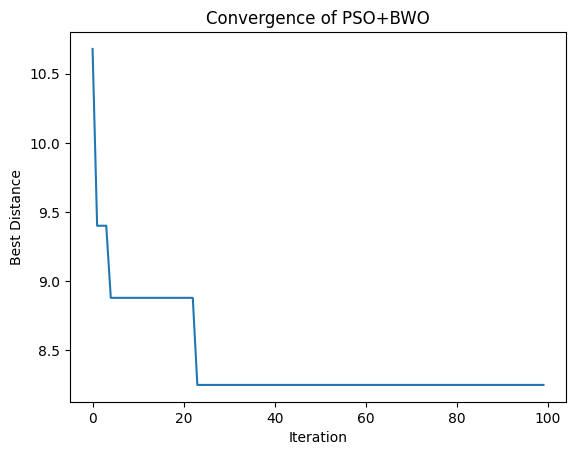

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define problem-specific parameters
num_cities = 20
city_coordinates = [(x, y) for x, y in zip(np.random.rand(num_cities), np.random.rand(num_cities))]

# Define PSO-related parameters
swarm_size = 50
max_iterations = 100
w = 0.5
c1 = 2.0
c2 = 2.0
neighborhood_size = 5

# Define BWO-related parameters
feeding_factor = 0.2

def calculate_fitness(solution):
    total_distance = calculate_total_distance(solution)
    num_unvisited_cities = num_cities - len(set(solution))
    penalty = num_unvisited_cities * 1000  # Adjust the penalty weight as needed
    return total_distance + penalty

def calculate_distance(city1, city2):
    return np.sqrt((city2[0] - city1[0]) ** 2 + (city2[1] - city1[1]) ** 2)



def calculate_total_distance(solution):
    total_distance = 0
    for i in range(len(solution)-1):
        total_distance += calculate_distance(city_coordinates[solution[i]], city_coordinates[solution[i+1]])
        total_distance += calculate_distance(city_coordinates[solution[-1]], city_coordinates[solution[0]])
    return total_distance

# Define PSO initialization
class Particle:
    def __init__(self, num_cities):
        self.solution = random.sample(range(num_cities), num_cities)
        self.velocity = np.zeros(num_cities)
        self.pbest_solution = self.solution[:]
        self.pbest_distance = float('inf')

def initialize_swarm(num_cities, swarm_size):
    return [Particle(num_cities) for _ in range(swarm_size)]

# Define PSO update equations
def update_particle_velocity(particle, gbest_solution):
    for i in range(len(particle.solution)):
        r1 = random.random()
        r2 = random.random()
        cognitive_velocity = c1 * r1 * (particle.pbest_solution[i] - particle.solution[i])
        social_velocity = c2 * r2 * (gbest_solution[i] - particle.solution[i])
        particle.velocity[i] = w * particle.velocity[i] + cognitive_velocity + social_velocity

def update_particle_position(particle):
    particle.solution = np.roll(particle.solution, int(particle.velocity[0]))
    particle.velocity = np.roll(particle.velocity, 1)

# Define BWO leader selection and bubble-net feeding
def select_global_leader(swarm):
    return min(swarm, key=lambda x: x.pbest_distance)

def bubble_net_feeding(swarm):
    global_leader = select_global_leader(swarm)
    for particle in swarm:
        for i in range(len(particle.solution)):
            if random.random() < feeding_factor:
                particle.solution[i] = global_leader.solution[i]

# Initialize PSO and BWO
swarm = initialize_swarm(num_cities, swarm_size)
gbest_solution = swarm[0].solution[:]
gbest_distance = calculate_total_distance(gbest_solution)

# PSO and BWO iterations
distances = []  # Store the best distance found in each iteration
for iteration in range(max_iterations):
    # Update particle velocities and positions (PSO)
    for particle in swarm:
        update_particle_velocity(particle, gbest_solution)
        update_particle_position(particle)

    # Update particle personal best (pbest) solutions and global best (gbest) solution (PSO)
    for particle in swarm:
        particle_distance = calculate_total_distance(particle.solution)
        if particle_distance < particle.pbest_distance:
            particle.pbest_distance = particle_distance
            particle.pbest_solution = particle.solution[:]
        if particle_distance < gbest_distance:
            gbest_distance = particle_distance
            gbest_solution = particle.solution[:]

    def bubble_net_feeding(swarm):
        global_leader = select_global_leader(swarm)
        for particle in swarm:
            for i in range(len(particle.solution)):
                if random.random() < feeding_factor:
                   if particle.solution[i] != global_leader.solution[i]:
                      unvisited_cities = set(range(num_cities)) - set(particle.solution)
                      particle.solution[i] = random.choice(list(unvisited_cities))


    # Store the best distance found in this iteration
    distances.append(gbest_distance)

# Print the best solution found
print("Best TSP solution (PSO+BWO):", gbest_solution)
print("Best TSP distance (PSO+BWO):", gbest_distance)

# Plot the convergence graph
plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('Convergence of PSO+BWO')
plt.show()


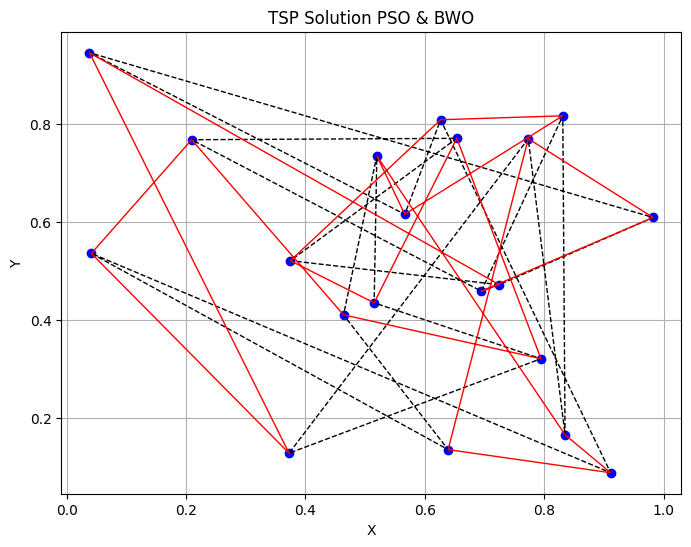

In [ ]:
# Plot the visited cities
# Convert city_coordinates to a NumPy array
# Plot the best solution found
x = [coord[0] for coord in city_coordinates]
y = [coord[1] for coord in city_coordinates]
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo')
plt.plot(x + [x[0]], y + [y[0]], 'k--', linewidth=1)
plt.plot([x[i] for i in gbest_solution] + [x[gbest_solution[0]]], [y[i] for i in gbest_solution] + [y[gbest_solution[0]]], 'r-', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution PSO & BWO')
plt.grid(True)
plt.show()
